In [9]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.animation as animation
from genetic_algorithm import GeneticAlgorithm
sns.set()

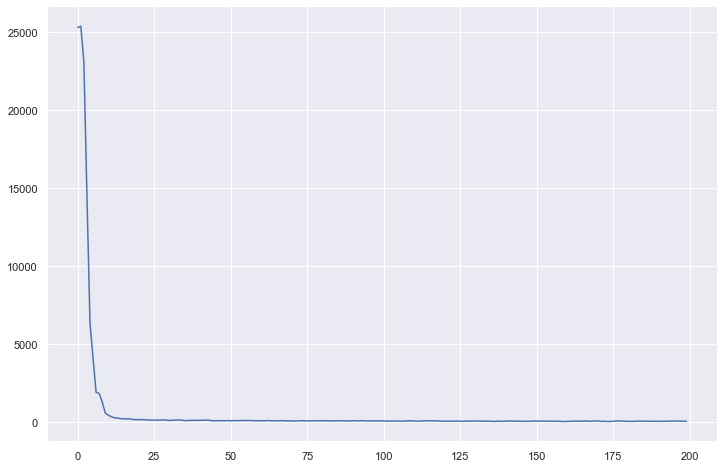

In [77]:
def func(x):
    return x**3 - 5* x**2 + 3*x - 10

x = np.linspace(-5, 5, 100)
y = func(x)
max_generation_number = 200

GA = GeneticAlgorithm(x, y, population_size = 100, mutation_probability = 0.1, polynomial_degree = 3,
                      initialization_bounds = (-5, 5), mutation_bounds = (-0.5, 0.5), max_generation_number = max_generation_number, elite = 20)
GA.run()

start = 0
stop = len(GA.history)

fig = plt.figure(figsize=(12,8))
graph0 = plt.plot([i for i in range(start, stop)], GA.history[start:stop])

grid1 = plt.grid(True)
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


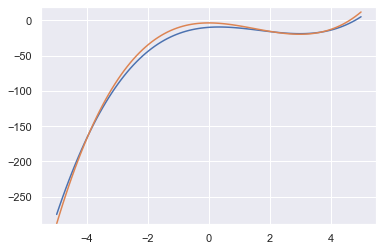

In [78]:
pause_gif_offset = 100
frames_count = max_generation_number+pause_gif_offset

fig, ax = plt.subplots()

line, = ax.plot(x, y)

approximation_line, = ax.plot(x, y)


def animate(i):
    if i >= max_generation_number:
        best_chromosome = GA.get_best_chromosome_in_epoch(-1)
    else:
        best_chromosome = GA.get_best_chromosome_in_epoch(i)
    regression_output = best_chromosome.regression_output(x)
    approximation_line.set_ydata(regression_output)
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=10, blit=True, save_count=frames_count)

ani.save('screenshots/animation.gif', writer='imagemagick')